In [3]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('/content/database.sqlite')

tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)


                name
0    sqlite_sequence
1  Player_Attributes
2             Player
3              Match
4             League
5            Country
6               Team
7    Team_Attributes


In [4]:
leagues = pd.read_sql_query("SELECT * FROM League", conn)
display(leagues)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [6]:
# All matches from the Premier League
matches = pd.read_sql_query("SELECT * FROM Match WHERE league_id = 1729", conn)
matches = matches.sort_values('date').reset_index(drop=True)

matches[['date', 'home_team_goal', 'away_team_goal']].head()


,date,home_team_goal,away_team_goal
0,2008-08-16 00:00:00,1,0
1,2008-08-16 00:00:00,0,1
2,2008-08-16 00:00:00,2,1
3,2008-08-16 00:00:00,2,3
4,2008-08-16 00:00:00,2,1


In [7]:
matches['goal_diff'] = matches['home_team_goal'] - matches['away_team_goal']

In [8]:
matches['date'] = pd.to_datetime(matches['date'])
matches['year'] = matches['date'].dt.year
matches['month'] = matches['date'].dt.month
matches['dayofweek'] = matches['date'].dt.dayofweek

In [9]:
df = matches[['date', 'home_team_goal', 'away_team_goal', 'goal_diff', 'year', 'month', 'dayofweek']].dropna()

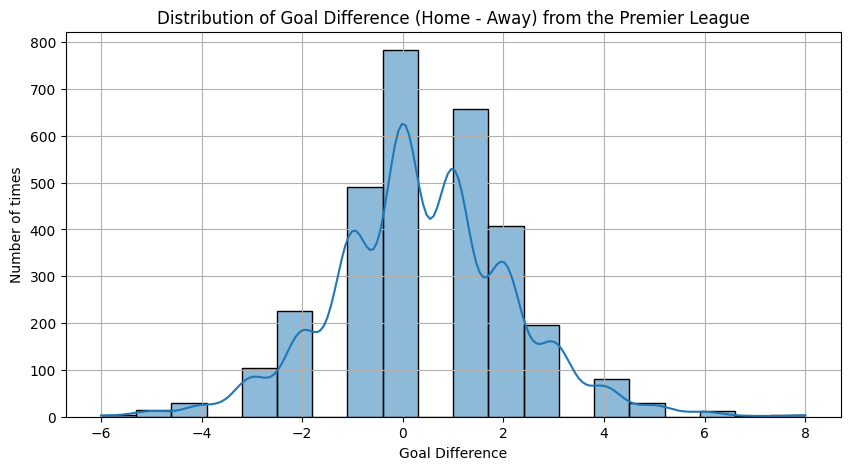

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='goal_diff', bins=20, kde=True)
plt.title('Distribution of Goal Difference (Home - Away) from the Premier League')
plt.xlabel('Goal Difference')
plt.ylabel('Number of times')
plt.grid(True)
plt.show()

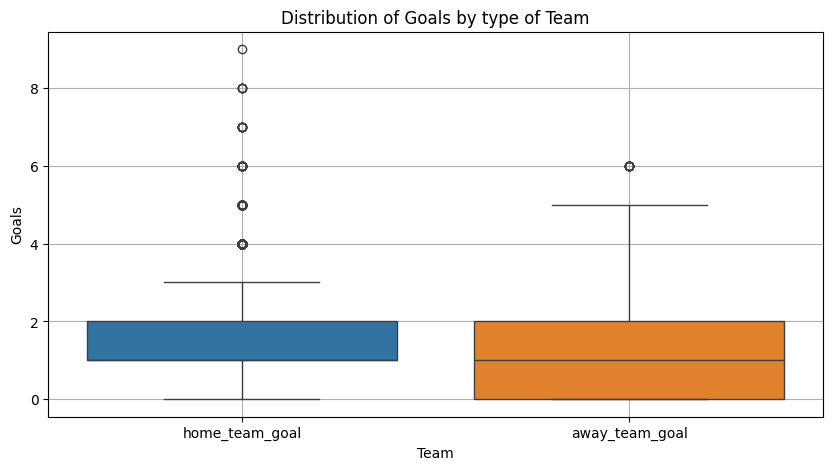

In [11]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['home_team_goal', 'away_team_goal']])
plt.title('Distribution of Goals by type of Team')
plt.xlabel('Team')
plt.ylabel('Goals')
plt.grid(True)
plt.show()

In [12]:
df.isnull().sum()

,0
date,0
home_team_goal,0
away_team_goal,0
goal_diff,0
year,0
month,0
dayofweek,0


In [13]:
print(df['goal_diff'].describe())

count    3040.000000
mean        0.391447
std         1.789165
min        -6.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: goal_diff, dtype: float64


In [14]:
features = ['year', 'month', 'dayofweek']
target = 'goal_diff'

In [16]:
df = df.sort_values('date').reset_index(drop=True)

# Size
total = len(df)
train_size = int(total * 0.7)
val_size = int(total * 0.15)
test_size = total - train_size - val_size

# Confirmation
print(f"Train: {train_size}, Validation: {val_size}, Test: {test_size}")

# Splits
train = df[:train_size]
val = df[train_size:train_size + val_size]
test = df[train_size + val_size:]

Train: 2128, Validation: 456, Test: 456


In [17]:
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

In [18]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_val = lr_model.predict(X_val)

mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)

print(f"Validation MSE: {mse:.2f}")
print(f"Validation MAE: {mae:.2f}")
print(f"Validation R²: {r2:.2f}")

Validation MSE: 3.22
Validation MAE: 1.42
Validation R²: -0.00


In [31]:
y_pred_test = lr_model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test MSE: {mse_test:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Test R²: {r2_test:.2f}")

Test MSE: 3.04
Test MAE: 1.37
Test R²: -0.00


In [20]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [21]:
y_pred_tree = tree_model.predict(X_val)

mse_tree = mean_squared_error(y_val, y_pred_tree)
mae_tree = mean_absolute_error(y_val, y_pred_tree)
r2_tree = r2_score(y_val, y_pred_tree)

print(f"Validation MSE (Tree): {mse_tree:.2f}")
print(f"Validation MAE (Tree): {mae_tree:.2f}")
print(f"Validation R² (Tree): {r2_tree:.2f}")

Validation MSE (Tree): 3.55
Validation MAE (Tree): 1.45
Validation R² (Tree): -0.11


In [23]:
y_pred_tree_test = tree_model.predict(X_test)

mse_tree_test = mean_squared_error(y_test, y_pred_tree_test)
mae_tree_test = mean_absolute_error(y_test, y_pred_tree_test)
r2_tree_test = r2_score(y_test, y_pred_tree_test)

print(f"Test MSE (Tree): {mse_tree_test:.2f}")
print(f"Test MAE (Tree): {mae_tree_test:.2f}")
print(f"Test R² (Tree): {r2_tree_test:.2f}")

Test MSE (Tree): 3.43
Test MAE (Tree): 1.43
Test R² (Tree): -0.13
